In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
import json
import os

In [2]:
# Import the files per year
file_2019 = 'Data_to_clean/all_contracts_prime_transactions_2019.csv'
file_2018 = 'Data_to_clean/all_contracts_prime_transactions_2018.csv'
file_2017 = 'Data_to_clean/all_contracts_prime_transactions_2017.csv'
file_2016 = 'Data_to_clean/all_contracts_prime_transactions_2016.csv'
file_2015 = 'Data_to_clean/all_contracts_prime_transactions_2015.csv'
file_2014 = 'Data_to_clean/all_contracts_prime_transactions_2014.csv'
file_2013 = 'Data_to_clean/all_contracts_prime_transactions_2013.csv'
file_2012 = 'Data_to_clean/all_contracts_prime_transactions_2012.csv'
#file_2011 = 'Data_to_clean/all_contracts_prime_transactions_2011.csv'
df_2019 = pd.read_csv(file_2019)
df_2018 = pd.read_csv(file_2018)
df_2017 = pd.read_csv(file_2017)
df_2016 = pd.read_csv(file_2016)
df_2015 = pd.read_csv(file_2015)
df_2014 = pd.read_csv(file_2014)
df_2013 = pd.read_csv(file_2013)
df_2012 = pd.read_csv(file_2012)
#df_2011 = pd.read_csv(file_2011)


C:\Users\yorch\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (21,30,39,55,56,87,88,115,116,159,160) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\yorch\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (21,30,39,55,56,73,87,88,115,116,159,160) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\yorch\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (3,21,30,39,56,87,88,115,116,159,160) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\yorch\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (3,21,30,39,55,56,73,159,160) have mixed types. 

In [3]:
# Print the amount of data we have for each year
print(f"Number of rows in 2019 data: {len(df_2019['award_id_piid'])}")
print(f"Number of rows in 2018 data: {len(df_2018['award_id_piid'])}")
print(f"Number of rows in 2017 data: {len(df_2017['award_id_piid'])}")
print(f"Number of rows in 2016 data: {len(df_2016['award_id_piid'])}")
print(f"Number of rows in 2015 data: {len(df_2015['award_id_piid'])}")
print(f"Number of rows in 2014 data: {len(df_2014['award_id_piid'])}")
print(f"Number of rows in 2013 data: {len(df_2013['award_id_piid'])}")
print(f"Number of rows in 2012 data: {len(df_2012['award_id_piid'])}")
#print(f"Number of rows in 2011 data: {len(df_2011['award_id_piid'])}")

Number of rows in 2019 data: 67396
Number of rows in 2018 data: 76785
Number of rows in 2017 data: 82985
Number of rows in 2016 data: 80696
Number of rows in 2015 data: 84112
Number of rows in 2014 data: 87627
Number of rows in 2013 data: 82889
Number of rows in 2012 data: 81966


In [4]:
# Print the number of columns we currently have for each year
print(f"Number of columns in 2019 data: {len(df_2019.columns)}")
print(f"Number of columns in 2018 data: {len(df_2018.columns)}")
print(f"Number of columns in 2017 data: {len(df_2017.columns)}")
print(f"Number of columns in 2016 data: {len(df_2016.columns)}")
print(f"Number of columns in 2015 data: {len(df_2015.columns)}")
print(f"Number of columns in 2014 data: {len(df_2014.columns)}")
print(f"Number of columns in 2013 data: {len(df_2013.columns)}")
print(f"Number of columns in 2012 data: {len(df_2012.columns)}")
#print(f"Number of columns in 2011 data: {len(df_2011.columns)}")

Number of columns in 2019 data: 277
Number of columns in 2018 data: 277
Number of columns in 2017 data: 277
Number of columns in 2016 data: 277
Number of columns in 2015 data: 277
Number of columns in 2014 data: 277
Number of columns in 2013 data: 277
Number of columns in 2012 data: 277


In [5]:
# Show all of the columns within the spreadsheets
for column in df_2019.columns:
    print(column)

contract_transaction_unique_key
contract_award_unique_key
award_id_piid
modification_number
transaction_number
parent_award_agency_id
parent_award_agency_name
parent_award_id
parent_award_modification_number
federal_action_obligation
total_dollars_obligated
base_and_exercised_options_value
current_total_value_of_award
base_and_all_options_value
potential_total_value_of_award
action_date
action_date_fiscal_year
period_of_performance_start_date
period_of_performance_current_end_date
period_of_performance_potential_end_date
ordering_period_end_date
solicitation_date
awarding_agency_code
awarding_agency_name
awarding_sub_agency_code
awarding_sub_agency_name
awarding_office_code
awarding_office_name
funding_agency_code
funding_agency_name
funding_sub_agency_code
funding_sub_agency_name
funding_office_code
funding_office_name
treasury_accounts_funding_this_award
federal_accounts_funding_this_award
foreign_funding
foreign_funding_description
sam_exception
sam_exception_description
recipient_d

In [6]:
# Take out all of the rows we know will not be needed at this time
columns_to_drop = ['parent_award_agency_id','parent_award_id','potential_total_value_of_award','base_and_exercised_options_value',
                              'current_total_value_of_award','base_and_all_options_value','ordering_period_end_date',
                              'awarding_agency_code','awarding_sub_agency_code','awarding_office_code','funding_agency_code',
                              'funding_sub_agency_code','funding_office_code','sam_exception','sam_exception_description','recipient_duns','recipient_doing_business_as_name',
                              'cage_code','recipient_parent_duns','recipient_country_code','recipient_address_line_2','recipient_state_code','domestic_shelter',
                              'community_development_corporation', 'us_government_entity','international_organization','small_agricultural_cooperative',
                              'sole_proprietorship','partnership_or_limited_liability_partnership','corporate_entity_tax_exempt','corporate_entity_not_tax_exempt',
                              'us_tribal_government','township_local_government','school_district_local_government','municipality_local_government',
                              'local_government_owned','inter_municipal_local_government','county_local_government','city_local_government',
                              'us_local_government','us_state_government','federally_funded_research_and_development_corp','us_federal_government',
                              'labor_surplus_area_firm','organizational_type','foreign_government','indian_tribe_federally_recognized','native_hawaiian_owned_business',
                               'contingency_humanitarian_or_peacekeeping_operation_code','purchase_card_as_payment_method_code',
                               'contract_financing','contract_financing_code','multi_year_contract_code','performance_based_service_acquisition',
                               'performance_based_service_acquisition_code','consolidated_contract','consolidated_contract_code','undefinitized_action',
                               'undefinitized_action_code','sea_transportation','sea_transportation_code','gfe_gfp','gfe_gfp_code','cost_accounting_standards_clause',
                               'cost_accounting_standards_clause_code','cost_or_pricing_data','cost_or_pricing_data_code','national_interest_action_code',
                               'parent_award_single_or_multiple_code','parent_award_type','parent_award_type_code','program_acronym',
                               'other_statutory_authority','interagency_contracting_authority','interagency_contracting_authority_code',
                               'construction_wage_rate_requirements_code','labor_standards_code','materials_supplies_articles_equipment',
                               'materials_supplies_articles_equipment_code','clinger_cohen_act_planning','clinger_cohen_act_planning_code',
                               'price_evaluation_adjustment_preference_percent_difference','local_area_set_aside','local_area_set_aside_code',
                               'fed_biz_opps_code','a76_fair_act_action_code','commercial_item_test_program','commercial_item_test_program_code','commercial_item_acquisition_procedures',
                               'commercial_item_acquisition_procedures_code','fair_opportunity_limited_sources_code','research_code','evaluated_preference',
                               'evaluated_preference_code','type_of_set_aside_code','solicitation_procedures_code','extent_competed_code',
                               'subcontracting_plan_code','place_of_manufacture_code','country_of_product_or_service_origin_code',
                               'epa_designated_product','epa_designated_product_code','information_technology_commercial_item_category',
                               'information_technology_commercial_item_category_code','dod_acquisition_program_description','dod_acquisition_program_code',
                               'domestic_or_foreign_entity_code','recovered_materials_sustainability_code','naics_code',
                               'dod_claimant_program_description','dod_claimant_program_code','contract_bundling','contract_bundling_code',
                               'inherently_governmental_functions_description','inherently_governmental_functions','solicitation_identifier',
                               'action_type_code','type_of_contract_pricing_code','type_of_idc','type_of_idc_code','multiple_or_single_award_idv',
                               'multiple_or_single_award_idv_code','idv_type','idv_type_code','award_type_code','award_or_idv_flag',
                               'primary_place_of_performance_congressional_district','primary_place_of_performance_zip_4','primary_place_of_performance_state_code',
                               'primary_place_of_performance_county_name','primary_place_of_performance_country_code',
                               'recipient_fax_number','recipient_phone_number','recipient_congressional_district','recipient_zip_4_code',
                               'foreign_funding_description','foreign_funding','federal_accounts_funding_this_award','treasury_accounts_funding_this_award',
                               'ordering_period_end_date','period_of_performance_potential_end_date','parent_award_modification_number',
                               'transaction_number','highly_compensated_officer_5_amount','highly_compensated_officer_5_name',
                             'highly_compensated_officer_4_amount','highly_compensated_officer_4_name',
                             'highly_compensated_officer_3_amount','highly_compensated_officer_3_name',
                             'highly_compensated_officer_2_amount','highly_compensated_officer_2_name',
                             'highly_compensated_officer_1_amount','highly_compensated_officer_1_name',
                             'last_modified_date','veterinary_college','school_of_forestry','native_hawaiian_servicing_institution',
                             'alaskan_native_servicing_institution','tribal_college','historically_black_college','minority_institution',
                             '1994_land_grant_college','1890_land_grant_college','1862_land_grant_college','1862_land_grant_college','state_controlled_institution_of_higher_learning',
                             'private_university_or_college','annual_revenue','number_of_employees','the_ability_one_program','other_not_for_profit_organization',
                             'nonprofit_organization','limited_liability_corporation','subchapter_scorporation','transit_authority','port_authority',
                             'planning_commission','interstate_entity','housing_authorities_public_tribal','council_of_governments',
                             'airport_authority','receives_contracts_and_grants','receives_grants','receives_contracts',
                             'hispanic_servicing_institution','veterinary_hospital','manufacturer_of_goods','hospital_flag','foundation','educational_institution']
df_2019_clean = df_2019.drop(columns_to_drop, axis=1)
df_2018_clean = df_2018.drop(columns_to_drop, axis=1)
df_2017_clean = df_2017.drop(columns_to_drop, axis=1)
df_2016_clean = df_2016.drop(columns_to_drop, axis=1)
df_2015_clean = df_2015.drop(columns_to_drop, axis=1)
df_2014_clean = df_2014.drop(columns_to_drop, axis=1)
df_2013_clean = df_2013.drop(columns_to_drop, axis=1)
df_2012_clean = df_2012.drop(columns_to_drop, axis=1)
#df_2011_clean = df_2011.drop(columns_to_drop, axis=1)

In [7]:
# Show the columns that we dropped
for column in columns_to_drop:
    print(column)

parent_award_agency_id
parent_award_id
potential_total_value_of_award
base_and_exercised_options_value
current_total_value_of_award
base_and_all_options_value
ordering_period_end_date
awarding_agency_code
awarding_sub_agency_code
awarding_office_code
funding_agency_code
funding_sub_agency_code
funding_office_code
sam_exception
sam_exception_description
recipient_duns
recipient_doing_business_as_name
cage_code
recipient_parent_duns
recipient_country_code
recipient_address_line_2
recipient_state_code
domestic_shelter
community_development_corporation
us_government_entity
international_organization
small_agricultural_cooperative
sole_proprietorship
partnership_or_limited_liability_partnership
corporate_entity_tax_exempt
corporate_entity_not_tax_exempt
us_tribal_government
township_local_government
school_district_local_government
municipality_local_government
local_government_owned
inter_municipal_local_government
county_local_government
city_local_government
us_local_government
us_state_

In [8]:
# Ensure that each dataframe only has data for a single year
print(f"2019 dataframe has data for: {df_2019_clean['action_date_fiscal_year'].unique()}")
print(f"2018 dataframe has data for: {df_2018_clean['action_date_fiscal_year'].unique()}")
print(f"2017 dataframe has data for: {df_2017_clean['action_date_fiscal_year'].unique()}")
print(f"2016 dataframe has data for: {df_2016_clean['action_date_fiscal_year'].unique()}")
print(f"2015 dataframe has data for: {df_2015_clean['action_date_fiscal_year'].unique()}")
print(f"2014 dataframe has data for: {df_2014_clean['action_date_fiscal_year'].unique()}")
print(f"2013 dataframe has data for: {df_2013_clean['action_date_fiscal_year'].unique()}")
print(f"2012 dataframe has data for: {df_2012_clean['action_date_fiscal_year'].unique()}")
#print(f"2011 dataframe has data for: {df_2011_clean['action_date_fiscal_year'].unique()}")

2019 dataframe has data for: [2019]
2018 dataframe has data for: [2018]
2017 dataframe has data for: [2017]
2016 dataframe has data for: [2016]
2015 dataframe has data for: [2015]
2014 dataframe has data for: [2014]
2013 dataframe has data for: [2013]
2012 dataframe has data for: [2012]


In [9]:
# Combine all years into a single dataframe
total_cleaned_data = df_2019_clean
total_cleaned_data = total_cleaned_data.append(df_2018_clean)
total_cleaned_data = total_cleaned_data.append(df_2017_clean)
total_cleaned_data = total_cleaned_data.append(df_2016_clean)
total_cleaned_data = total_cleaned_data.append(df_2015_clean)
total_cleaned_data = total_cleaned_data.append(df_2014_clean)
total_cleaned_data = total_cleaned_data.append(df_2013_clean)
total_cleaned_data = total_cleaned_data.append(df_2012_clean)
#total_cleaned_data = total_cleaned_data.append(df_2011_clean)

In [10]:
# Show the amount of data we have for each column
total_cleaned_data.count()

contract_transaction_unique_key                               644456
contract_award_unique_key                                     644456
award_id_piid                                                 644456
modification_number                                           644456
parent_award_agency_name                                      387899
federal_action_obligation                                     644456
total_dollars_obligated                                       209102
action_date                                                   644456
action_date_fiscal_year                                       644456
period_of_performance_start_date                              644456
period_of_performance_current_end_date                        644455
solicitation_date                                               3153
awarding_agency_name                                          644456
awarding_sub_agency_name                                      644456
awarding_office_name              

In [11]:
# Export final dataframe to CSV
#total_cleaned_data.to_csv("Annual_HSS_Data_Cleaned.csv", index=False)

In [12]:
total_cleaned_data.head()

,contract_transaction_unique_key,contract_award_unique_key,award_id_piid,modification_number,parent_award_agency_name,federal_action_obligation,total_dollars_obligated,action_date,action_date_fiscal_year,period_of_performance_start_date,...,community_developed_corporation_owned_firm,federal_agency,foreign_owned_and_located,for_profit_organization,dot_certified_disadvantage,self_certified_small_disadvantaged_business,small_disadvantaged_business,c8a_program_participant,historically_underutilized_business_zone_hubzone_firm,sba_certified_8a_joint_venture
0,7523_-NONE-_75D30118C01909_P00001_-NONE-_0,CONT_AWD_75D30118C01909_7523_-NONE-_-NONE-,75D30118C01909,P00001,NaN,0.0,295822.88,2018-10-02,2019,2018-09-28 00:00:00,...,f,f,f,t,t,t,f,t,t,f
1,7523_-NONE-_75D30118C02052_P00001_-NONE-_0,CONT_AWD_75D30118C02052_7523_-NONE-_-NONE-,75D30118C02052,P00001,NaN,0.0,152355.17,2018-10-02,2019,2018-09-28 00:00:00,...,f,f,f,t,t,t,f,t,t,f
2,7523_-NONE-_HHSD200201692404C_3_-NONE-_0,CONT_AWD_HHSD200201692404C_7523_-NONE-_-NONE-,HHSD200201692404C,3,NaN,0.0,1308998.24,2018-10-01,2019,2018-10-01 00:00:00,...,f,f,f,t,f,t,f,t,t,f
3,7523_-NONE-_HHSD200201692405C_3_-NONE-_0,CONT_AWD_HHSD200201692405C_7523_-NONE-_-NONE-,HHSD200201692405C,3,NaN,0.0,9700.00,2018-10-01,2019,2018-10-01 00:00:00,...,f,f,f,t,f,f,f,f,f,f
4,7523_-NONE-_HHSD200201692406C_8_-NONE-_0,CONT_AWD_HHSD200201692406C_7523_-NONE-_-NONE-,HHSD200201692406C,8,NaN,0.0,614109.66,2018-10-01,2019,2018-10-01 00:00:00,...,f,f,f,t,f,f,f,f,f,f


In [13]:
#Available dates
# action_date 
# action_date_fiscal_year
# period_of_performance_start_date
# period_of_performance_current_end_date
# solicitation_date

#needed
# contract_award_unique_key
# federal_action_obligation

In [14]:
small_table = pd.DataFrame(total_cleaned_data['contract_award_unique_key'])
small_table['federal_action_obligation'] = total_cleaned_data['federal_action_obligation']
small_table['action_date'] = total_cleaned_data['action_date']
small_table['action_date_fiscal_year'] = total_cleaned_data['action_date_fiscal_year']
small_table.head()

,contract_award_unique_key,federal_action_obligation,action_date,action_date_fiscal_year
0,CONT_AWD_75D30118C01909_7523_-NONE-_-NONE-,0.0,2018-10-02,2019
1,CONT_AWD_75D30118C02052_7523_-NONE-_-NONE-,0.0,2018-10-02,2019
2,CONT_AWD_HHSD200201692404C_7523_-NONE-_-NONE-,0.0,2018-10-01,2019
3,CONT_AWD_HHSD200201692405C_7523_-NONE-_-NONE-,0.0,2018-10-01,2019
4,CONT_AWD_HHSD200201692406C_7523_-NONE-_-NONE-,0.0,2018-10-01,2019


In [15]:
small_table_grouped = small_table.groupby('action_date_fiscal_year')
table_1 = pd.DataFrame(small_table_grouped['federal_action_obligation'].sum())
table_1

,federal_action_obligation
action_date_fiscal_year,
2012,1.835646e+10
2013,1.976718e+10
2014,2.155077e+10
2015,1.960495e+10
2016,1.989308e+10
2017,2.245030e+10
2018,2.144154e+10
2019,2.201639e+10


In [16]:
years = small_table_grouped['action_date_fiscal_year'].unique()
years

action_date_fiscal_year
2012    [2012]
2013    [2013]
2014    [2014]
2015    [2015]
2016    [2016]
2017    [2017]
2018    [2018]
2019    [2019]
Name: action_date_fiscal_year, dtype: object

In [33]:
amount = table_1['federal_action_obligation']
#pd.options.display.float_format = '{:,.2f}'.format
amount = amount/1000000000
amount = pd.DataFrame(amount)
amount

,federal_action_obligation
action_date_fiscal_year,
2012,18.356459
2013,19.767176
2014,21.550774
2015,19.604947
2016,19.893077
2017,22.450301
2018,21.441538
2019,22.016393


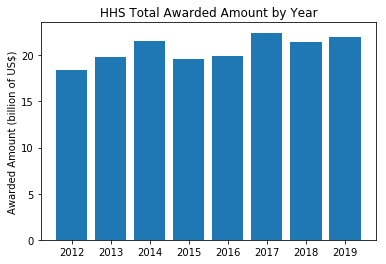

<Figure size 2160x2160 with 0 Axes>

In [18]:
#Simple plot of total amount per year

fig, ax = plt.subplots()

chart_1 = ax.bar(years, amount)
ax.set_ylabel('Awarded Amount (billion of US$)')
ax.set_title('HHS Total Awarded Amount by Year')

plt.figure(figsize=(30,30))

plt.show()

In [19]:
#Add a column with only the month from each date
#This is the final table to work with
small_table['month'] = pd.DatetimeIndex(small_table['action_date']).month
small_table.head()

,contract_award_unique_key,federal_action_obligation,action_date,action_date_fiscal_year,month
0,CONT_AWD_75D30118C01909_7523_-NONE-_-NONE-,0.0,2018-10-02,2019,10
1,CONT_AWD_75D30118C02052_7523_-NONE-_-NONE-,0.0,2018-10-02,2019,10
2,CONT_AWD_HHSD200201692404C_7523_-NONE-_-NONE-,0.0,2018-10-01,2019,10
3,CONT_AWD_HHSD200201692405C_7523_-NONE-_-NONE-,0.0,2018-10-01,2019,10
4,CONT_AWD_HHSD200201692406C_7523_-NONE-_-NONE-,0.0,2018-10-01,2019,10


In [20]:
#count how many contracts were awarded each month
#this defines the code for the first chart
small_table_g2 = small_table.groupby(['action_date_fiscal_year','month'])
small_table_g2 = small_table_g2["contract_award_unique_key"].count()
small_table_g2 = pd.DataFrame(small_table_g2)
small_table_g2.head()



# Use df.plot use line as the graph type
# Your dimensions should be configured by way of your indexes (year and month)
# Holler @ me if you get stuck

contract_award_unique_key
action_date_fiscal_year month                           
2012                    1                           6206
                        2                           5618
                        3                           6426
                        4                           5490
                        5                           6174

In [21]:
pivot_table = pd.pivot_table(small_table_g2, values = 'contract_award_unique_key', index = "month", columns = "action_date_fiscal_year")
pivot_table

action_date_fiscal_year,2012,2013,2014,2015,2016,2017,2018,2019
month,,,,,,,,
1,6206,5683,6209,5925,4958,6511,5464,4253
2,5618,5074,6409,5812,6155,5760,5703,5355
3,6426,6332,7679,8150,7477,7357,6635,5713
4,5490,6870,7047,6934,6631,6409,5484,5620
5,6174,7182,7044,5967,6303,6515,6728,5834
6,6486,6991,7609,7323,7247,6705,6746,6196
7,7099,8516,8350,8293,7041,7076,8062,6300
8,10948,11117,9551,9634,9829,10538,9226,7889
9,11980,12541,12353,12221,11817,12606,10091,9221


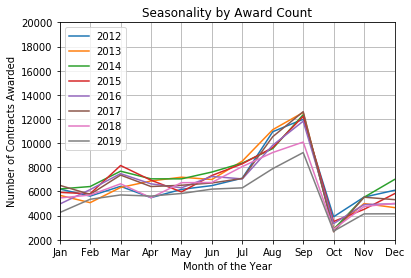

In [22]:
#build seasonality chart
#pivot_table.plot()
#lines = pivot_table.plot.line(subplots = True)
lines = pivot_table.plot.line()
#handles = [2011,2012,2013,2014,2015,2016,2017,2018,2019]
plt.legend(loc="upper left")
plt.title("Seasonality by Award Count")
plt.xlabel("Month of the Year")
plt.ylabel("Number of Contracts Awarded")
plt.grid()
plt.ylim(2000, 20000)
plt.xticks(np.arange(1, 13, 1),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))

plt.savefig("Seasonality1.png")

plt.show()

In [23]:
#this defines the code for the second chart
small_table_g3 = small_table.groupby(['action_date_fiscal_year','month'])
small_table_g3 = small_table_g3["federal_action_obligation"].sum()
small_table_g3 = pd.DataFrame(small_table_g3)/1000000000
small_table_g3.head()


federal_action_obligation
action_date_fiscal_year month                           
2012                    1                       0.672068
                        2                       1.139795
                        3                       1.321782
                        4                       0.974864
                        5                       1.694266

In [24]:
pivot_table_g3 = pd.pivot_table(small_table_g3, values = 'federal_action_obligation', index = "month", columns = "action_date_fiscal_year")
pivot_table_g3

action_date_fiscal_year,2012,2013,2014,2015,2016,2017,2018,2019
month,,,,,,,,
1,0.672068,1.295900,0.672019,1.490655,0.808164,0.765413,1.288000,1.070145
2,1.139795,0.563613,1.197205,0.806403,1.019942,1.115881,1.044577,1.232582
3,1.321782,1.980478,2.198831,1.364586,1.334295,2.962688,1.323575,1.841994
4,0.974864,0.848594,1.292529,1.632783,1.611625,1.455673,1.036895,1.643067
5,1.694266,1.274242,1.395635,0.976755,1.340800,1.100592,1.652475,1.735152
6,1.163054,1.997141,2.003001,1.824692,1.716404,2.327092,1.888662,1.552647
7,1.252456,1.420467,2.368088,1.567293,1.507867,1.730440,1.664623,1.852451
8,2.851355,2.391951,2.317448,1.787139,2.850815,3.080519,2.735051,3.024256
9,4.559530,5.691073,5.140865,5.296866,5.701752,5.481863,5.668998,5.657765


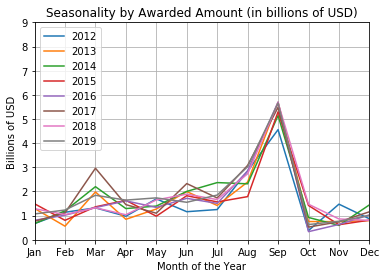

In [25]:
lines_g3 = pivot_table_g3.plot.line()
#handles = [2011,2012,2013,2014,2015,2016,2017,2018,2019]
plt.legend(loc="upper left")
plt.title("Seasonality by Awarded Amount (in billions of USD)")
plt.xlabel("Month of the Year")
plt.ylabel("Billions of USD")
plt.grid()
plt.ylim(0, 9)
plt.xticks(np.arange(1, 13, 1),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))

plt.savefig("Seasonality2.png")


plt.show()

In [26]:
#Chart 3 amounts by award (test if seasonality is diluted)
diluted = pivot_table_g3/pivot_table*1000000
diluted = pd.DataFrame(diluted)
#diluted['Mean'] = diluted.mean(axis=1)
#diluted = pd.DataFrame(diluted)
diluted

action_date_fiscal_year,2012,2013,2014,2015,2016,2017,2018,2019
month,,,,,,,,
1,108.293216,228.031046,108.233117,251.587339,163.002115,117.556900,235.724662,251.621259
2,202.882784,111.078605,186.800607,138.747952,165.709472,193.729262,183.162735,230.173976
3,205.692785,312.772866,286.343432,167.433916,178.453251,402.703324,199.483872,322.421519
4,177.570779,123.521724,183.415469,235.474870,243.044075,227.129520,189.076469,292.360673
5,274.419549,177.421668,198.130970,163.692832,212.724033,168.931962,245.611592,297.420653
6,179.317614,285.673200,263.241025,249.172800,236.843441,347.068087,279.967677,250.588538
7,176.427140,166.799770,283.603408,188.989880,214.155278,244.550532,206.477663,294.039841
8,260.445313,215.161521,242.639292,185.503275,290.041169,292.324832,296.450383,383.350997
9,380.595141,453.797360,416.163271,433.423247,482.504210,434.861412,561.787571,613.573885


In [27]:
#Obama Period 2
obama = diluted.drop([2012,2017,2018,2019], axis =1)
obama['Mean Obama'] = obama.median(axis =1)
obama
obama_mean = obama['Mean Obama']
obama_mean

month
1     195.516581
2     152.228712
3     232.398341
4     209.445169
5     187.776319
6     256.206913
7     201.572579
8     228.900406
9     443.610303
10    291.112000
11    133.598076
12    188.691374
Name: Mean Obama, dtype: float64

In [28]:
#Trump
trump = diluted.drop([2012,2013,2014,2015,2016], axis =1)
trump['Mean Trump'] = trump.median(axis =1)
trump
trump_mean = trump['Mean Trump']
trump_mean

month
1     235.724662
2     193.729262
3     322.421519
4     227.129520
5     245.611592
6     279.967677
7     244.550532
8     296.450383
9     561.787571
10    232.427971
11    181.372181
12    217.726759
Name: Mean Trump, dtype: float64

In [29]:
#Mean total Since 2012
allgov = diluted
allgov['Mean All'] = allgov.median(axis =1)
allgov
allgov_mean = allgov['Mean All']
allgov_mean

month
1     195.516581
2     184.981671
3     246.018109
4     208.102995
5     205.427502
6     256.914782
7     210.316471
8     275.243241
9     444.329386
10    245.861805
11    144.131899
12    188.691374
Name: Mean All, dtype: float64

In [30]:
#Dataframe of mean award value by government
mean_df = pd.DataFrame()
mean_df['Obama 2nd'] = obama_mean
mean_df['Trump'] = trump_mean
mean_df['All'] = allgov_mean
mean_df

,Obama 2nd,Trump,All
month,,,
1,195.516581,235.724662,195.516581
2,152.228712,193.729262,184.981671
3,232.398341,322.421519,246.018109
4,209.445169,227.129520,208.102995
5,187.776319,245.611592,205.427502
6,256.206913,279.967677,256.914782
7,201.572579,244.550532,210.316471
8,228.900406,296.450383,275.243241
9,443.610303,561.787571,444.329386


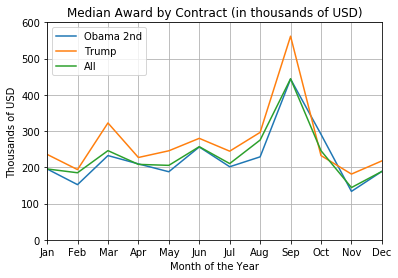

In [32]:
lines_g4 = mean_df.plot()
#handles = [2011,2012,2013,2014,2015,2016,2017,2018,2019]
plt.legend(loc="upper left")
plt.title("Median Award by Contract (in thousands of USD)")
plt.xlabel("Month of the Year")
plt.ylabel("Thousands of USD")
plt.grid()
plt.ylim(0, 600)
plt.xticks(np.arange(1, 13, 1),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))

plt.savefig("Seasonality3.png")


plt.show()